In [1]:
import torch
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torchvision.models import ResNet34_Weights
import numpy as np
import torchvision.transforms as transforms        
from torch.utils.data import DataLoader
from torch.utils.data import Subset
from src.temperature_scaling import ModelWithTemperature
from src.imagenet_real import aps_imagenet_real_hist, raps_imagenet_real_hist, saps_imagenet_real_hist, aps_imagenet_real_scatter, raps_imagenet_real_scatter, saps_imagenet_real_scatter

#  Preprocess
data_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])

sorted_val_path = "D:\\Download\\ImageNet-1K\\Validation_Set\\sorted_ImageNet_val"
dataset = ImageFolder(root=sorted_val_path, transform=data_transform)

# load pre-trained model 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet34(weights=ResNet34_Weights.IMAGENET1K_V1).to(device)


# Temperature Scaling
subset_size = len(dataset) // 10
indices = np.random.choice(len(dataset), subset_size, replace=False)
subset_dataset = Subset(dataset, indices)
train_loader = DataLoader(subset_dataset, batch_size=32, shuffle=False, num_workers=2)
model = ModelWithTemperature(model, temperature = 1.2).to(device)
model.set_temperature(train_loader)

model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.1

Before temperature - NLL: 1.137, ECE: 0.020
Optimal temperature: 1.119
After temperature - NLL: 1.147, ECE: 0.036


APS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9016 ± 0.0019
Final Average Prediction Set Size: 14.16 ± 0.35
Final Average Coverage: 0.8992 ± 0.0026
Final Average Real Probability: 0.8182 ± 0.0036


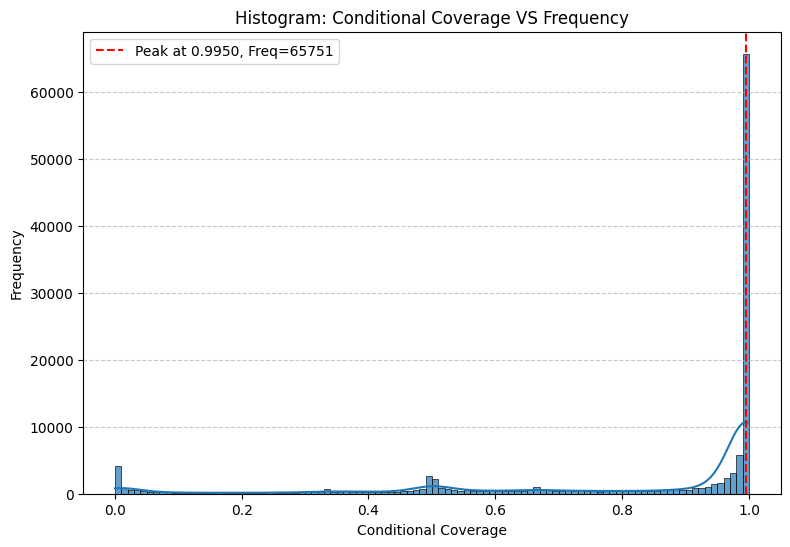

65751 (52.87%) samples reached the peak conditional coverage at 0.9950


In [2]:
aps_imagenet_real_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

RAPS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9348 ± 0.0025
Final Average Prediction Set Size: 4.34 ± 0.04
Final Average Coverage: 0.8987 ± 0.0029
Final Average Real Probability: 0.7872 ± 0.0035


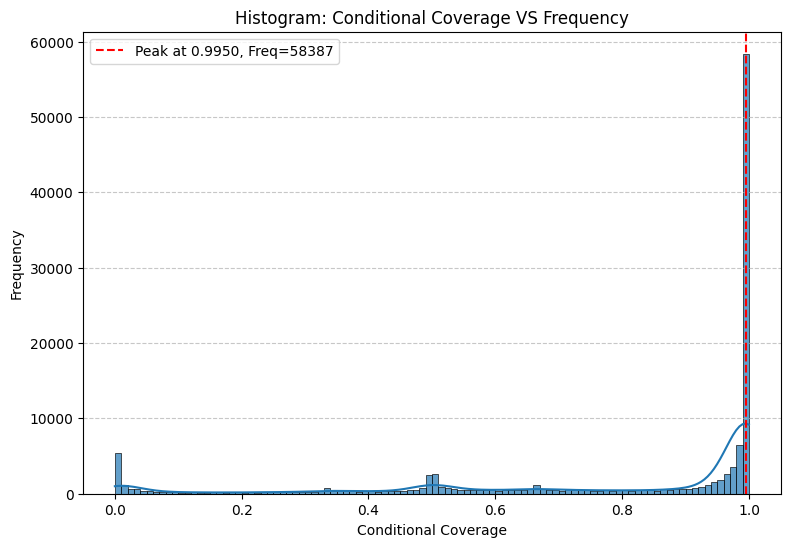

58387 (46.95%) samples reached the peak conditional coverage at 0.9950


In [3]:
raps_imagenet_real_hist(model, dataset, device, lambda_=0.07, k_reg=9, num_runs=10, alpha=0.1, is_ground_truth=False)

SAPS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.0193 ± 0.0113
Final Average Prediction Set Size: 2.96 ± 0.07
Final Average Coverage: 0.8990 ± 0.0037
Final Average Real Probability: 0.7427 ± 0.0055


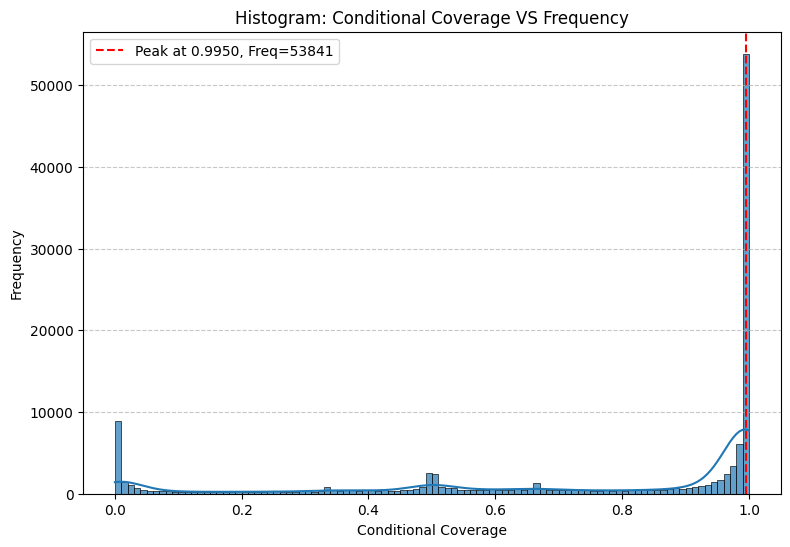

53841 (43.29%) samples reached the peak conditional coverage at 0.9950


In [4]:
saps_imagenet_real_hist(model, dataset, device, lambda_=0.15, num_runs=10, alpha=0.1, is_ground_truth=False)

APS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9016 ± 0.0019
Final Average Prediction Set Size: 14.16 ± 0.35
Final Average Coverage: 0.8992 ± 0.0026
Final Average Real Probability: 0.8182 ± 0.0036


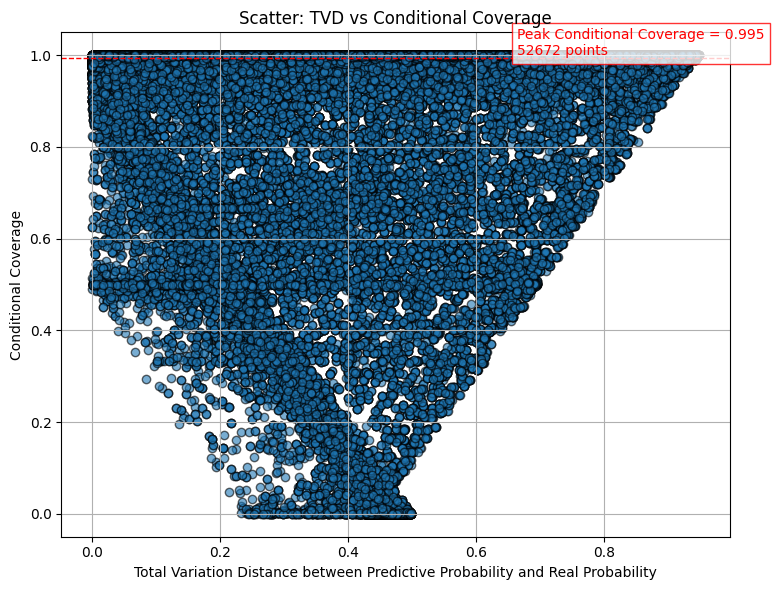

Peak Conditional Coverage = 0.995, with 52672 samples

=== Count Regions Summary ===
40974 (32.9%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
35223 (28.3%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
29767 (23.9%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.95205']
  Real Probability Set      : ['0.99278']
Sample 2:
  Predictive Probability Set: ['0.97978']
  Real Probability Set      : ['0.97938']
Sample 3:
  Predictive Probability Set: ['0.50813', '0.36191']
  Real Probability Set      : ['0.57406', '0.40906']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.75874', '0.13732']
  Real Probability Set      : ['0.00496', '0.00140']
Sample 2:
  Predictive Probability Set: ['0.66330', '0.19842', '0.03837']
  Real Probability Set      : ['0.07389', '0.00031', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.468

In [5]:
aps_imagenet_real_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9348 ± 0.0025
Final Average Prediction Set Size: 4.34 ± 0.04
Final Average Coverage: 0.8987 ± 0.0029
Final Average Real Probability: 0.7872 ± 0.0035


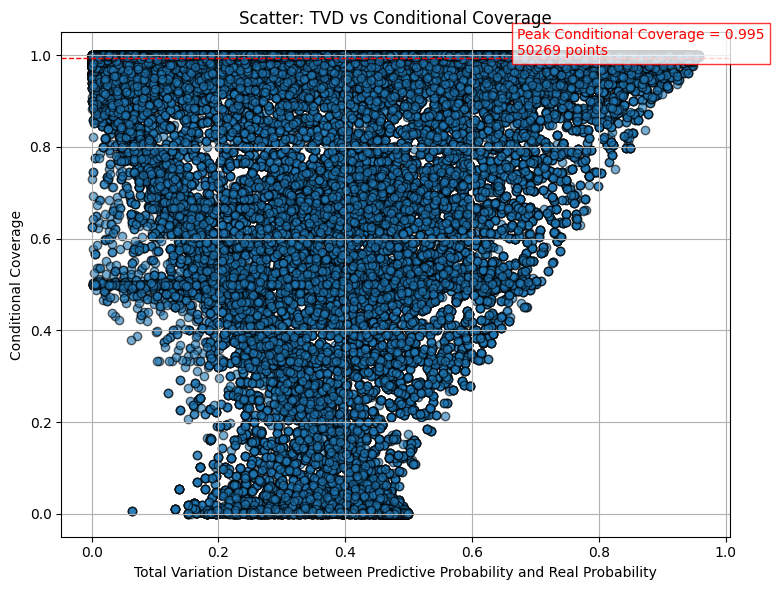

Peak Conditional Coverage = 0.995, with 50269 samples

=== Count Regions Summary ===
44841 (36.1%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
31159 (25.1%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
35232 (28.3%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.98075']
  Real Probability Set      : ['0.99256']
Sample 2:
  Predictive Probability Set: ['0.97316']
  Real Probability Set      : ['0.97297']
Sample 3:
  Predictive Probability Set: ['0.79266']
  Real Probability Set      : ['0.97857']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.20439', '0.08167', '0.07591', '0.06305', '0.03630', '0.02665', '0.02260', '0.02018', '0.01772', '0.01514', '0.01510', '0.01353', '0.01046']
  Real Probability Set      : ['0.00000', '0.00000', '0.00000', '0.03868', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000'

In [6]:
raps_imagenet_real_scatter(model, dataset, device, lambda_=0.07, k_reg=9, num_runs=10, alpha=0.1)

SAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.0193 ± 0.0113
Final Average Prediction Set Size: 2.96 ± 0.07
Final Average Coverage: 0.8990 ± 0.0037
Final Average Real Probability: 0.7427 ± 0.0055


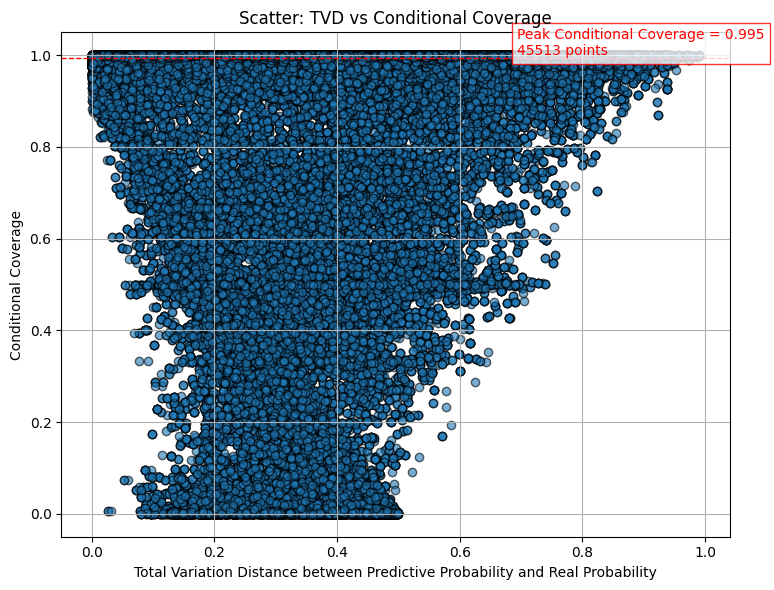

Peak Conditional Coverage = 0.995, with 45513 samples

=== Count Regions Summary ===
46936 (37.7%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
23654 (19.0%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
43541 (35.0%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.97290', '0.01665']
  Real Probability Set      : ['0.98628', '0.00883']
Sample 2:
  Predictive Probability Set: ['0.94487', '0.02100']
  Real Probability Set      : ['0.99949', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.96674', '0.00850']
  Real Probability Set      : ['0.92755', '0.00000']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.97759', '0.01086']
  Real Probability Set      : ['0.19167', '0.00484']
Sample 2:
  Predictive Probability Set: ['0.31735', '0.19469', '0.07888', '0.02941', '0.02228', '0.02015']
  Real Probability Set      : ['0.

In [7]:
saps_imagenet_real_scatter(model, dataset, device, lambda_=0.15, num_runs=10, alpha=0.1)